## table3.21.csv

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.tsa.api as smt
from statsmodels.stats.diagnostic import acorr_ljungbox as lb_test

## statsmodels自帶的畫ACF的函數

In [3]:
def drawts(y,pname):
    ##draw ax
    fig = plt.figure(figsize=(10,8))
    ts_ax=plt.subplot2grid((2,2),(0,0),colspan=2)
    acf_ax=plt.subplot2grid((2,2),(1,0))
    pacf_ax=plt.subplot2grid((2,2),(1,1))
    ##draw plot
    ts_ax.plot(y,'*-')
    ts_ax.set_title('Time Series Analysis Plots')
    smt.graphics.plot_acf(y,lags=None,ax=acf_ax,alpha=0.05) ##2sigma
    smt.graphics.plot_pacf(y,lags=None,ax=pacf_ax,alpha=0.05)  ##2sigma
    #plt.savefig('%s.jpg'%pname,dpi=256)
    plt.show()
    plt.close()

## statsmodels自帶的LB test

In [4]:
def purerandtest(y):
    a,b=lb_test(y,lags=None,boxpierce=False)
    LB_purerand=pd.DataFrame(np.c_[a,b],columns=['LB','Pvalue'])
    LB_purerand['lags']=range(1,len(a)+1)
    print('----time series: LB pure randomness test----')
    print(LB_purerand)

## 開始分析

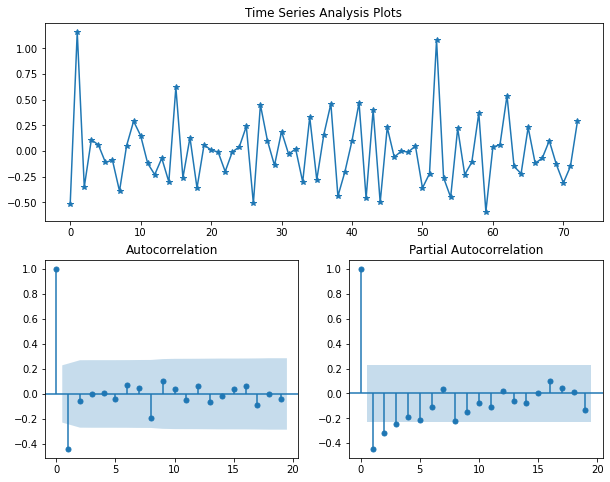

----time series: LB pure randomness test----
           LB    Pvalue  lags
0   14.684641  0.000127     1
1   14.938346  0.000570     2
2   14.938352  0.001870     3
3   14.948174  0.004810     4
4   15.074761  0.010048     5
5   15.464415  0.016936     6
6   15.626514  0.028756     7
7   18.718054  0.016442     8
8   19.670294  0.020060     9
9   19.797380  0.031228    10
10  19.976246  0.045668    11
11  20.348599  0.060772    12
12  20.715666  0.078746    13
13  20.732550  0.108685    14
14  20.889312  0.140403    15
15  21.273775  0.168225    16
16  22.017357  0.184052    17
17  22.018829  0.231150    18
18  22.178144  0.275480    19
19  22.178363  0.330911    20
20  22.764258  0.356675    21
21  23.083826  0.397009    22
22  27.529596  0.234094    23
23  29.316012  0.208464    24
24  29.753627  0.233647    25
25  31.143698  0.222961    26
26  32.019101  0.231378    27
27  34.459848  0.186141    28
28  36.869084  0.149603    29
29  37.221586  0.170774    30
30  38.585925  0.164128  

/Users/shaohuasong/miniforge3/lib/python3.9/site-packages/statsmodels/stats/diagnostic.py:531: FutureWarning: The default value of lags is changing.  After 0.12, this value will become min(10, nobs//5). Directly setlags to silence this warning.
  warnings.warn("The default value of lags is changing.  After 0.12, "
/Users/shaohuasong/miniforge3/lib/python3.9/site-packages/statsmodels/stats/diagnostic.py:559: FutureWarning: The value returned will change to a single DataFrame after 0.12 is released.  Set return_df to True to use to return a DataFrame now.  Set return_df to False to silence this warning.
  warnings.warn(msg, FutureWarning)


In [5]:
##read data
dfname='table3.21'
y=pd.read_csv('%s.csv'%dfname,header=None)
y.iloc[:,0]=y.iloc[:,0].astype('float')
y=y.values[:,0]
y=y[1:]-y[:-1]
drawts(y,dfname)
purerandtest(y)

## 參數估計

In [6]:
import statsmodels.tsa.api as smt
arma11=smt.ARMA(y,(1,1)).fit()
print('\n----fitting summary----')
print(arma11.summary())
print('sigma 2 of residual: %f'%arma11.sigma2)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.28746D-01    |proj g|=  1.49598D-01

At iterate    5    f=  9.25406D-02    |proj g|=  2.32640D-01

At iterate   10    f=  8.56062D-02    |proj g|=  2.63451D+00

At iterate   15    f=  6.90188D-02    |proj g|=  1.38152D-02

At iterate   20    f=  6.82895D-02    |proj g|=  7.06530D-02

At iterate   25    f=  6.82195D-02    |proj g|=  9.45892D-03

At iterate   30    f=  6.82162D-02    |proj g|=  2.21082D-03

At iterate   35    f=  6.82160D-02    |proj g|=  1.62527D-03

At iterate   40    f=  6.82160D-02    |proj g|=  7.83359D-05

At iterate   45    f=  6.82160D-02    |proj g|=  1.93578D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

/Users/shaohuasong/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Users/s

## 模型顯著性檢驗

In [7]:
resid=arma10.resid
print('\n----residual pure randomness test')
purerandtest(resid)

NameError: name 'arma10' is not defined

In [10]:
##predict
myalpha=0.05
predvalue,predsigma,cinterval=arma10.forecast(steps=10,alpha=myalpha)
data1=np.c_[predvalue,predsigma,cinterval]
preddata=pd.DataFrame(data1,columns=['value','sigma','interval_left','interval_right'])
print('----prediction confidence interval: %d %%'%((1-myalpha)*100))
print(preddata)

----prediction confidence interval: 95 %
      value     sigma  interval_left  interval_right
0  0.037873  0.124484      -0.206112        0.281857
1  0.018106  0.138903      -0.254138        0.290350
2  0.010347  0.140993      -0.265995        0.286689
3  0.007301  0.141313      -0.269667        0.284269
4  0.006105  0.141362      -0.270960        0.283170
5  0.005636  0.141370      -0.271444        0.282715
6  0.005451  0.141371      -0.271631        0.282533
7  0.005379  0.141371      -0.271703        0.282461
8  0.005350  0.141371      -0.271732        0.282433
9  0.005339  0.141371      -0.271743        0.282421


## 分析預測

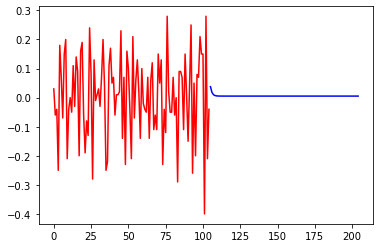

In [9]:
plt.plot(np.arange(len(y)),y,color='red')
plt.plot(np.arange(len(y),len(y)+len(predvalue)),predvalue,color='blue')
plt.show()

In [20]:
gk=np.zeros(100)
gk[0]=1
gk[1]=0.3926-0.8876
gk[2:]=(0.3926-0.8876)*0.3926**np.arange(1,99)

myvar=np.zeros(100)
for i in range(1,100):
    myvar[i]=np.sum(gk[:i]**2)*0.015496

mystd=myvar**0.5
print(mystd)

[0.         0.12448293 0.13889891 0.14098987 0.1413094  0.14135859
 0.14136617 0.14136734 0.14136752 0.14136755 0.14136755 0.14136755
 0.14136755 0.14136755 0.14136755 0.14136755 0.14136755 0.14136755
 0.14136755 0.14136755 0.14136755 0.14136755 0.14136755 0.14136755
 0.14136755 0.14136755 0.14136755 0.14136755 0.14136755 0.14136755
 0.14136755 0.14136755 0.14136755 0.14136755 0.14136755 0.14136755
 0.14136755 0.14136755 0.14136755 0.14136755 0.14136755 0.14136755
 0.14136755 0.14136755 0.14136755 0.14136755 0.14136755 0.14136755
 0.14136755 0.14136755 0.14136755 0.14136755 0.14136755 0.14136755
 0.14136755 0.14136755 0.14136755 0.14136755 0.14136755 0.14136755
 0.14136755 0.14136755 0.14136755 0.14136755 0.14136755 0.14136755
 0.14136755 0.14136755 0.14136755 0.14136755 0.14136755 0.14136755
 0.14136755 0.14136755 0.14136755 0.14136755 0.14136755 0.14136755
 0.14136755 0.14136755 0.14136755 0.14136755 0.14136755 0.14136755
 0.14136755 0.14136755 0.14136755 0.14136755 0.14136755 0.1413